In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [ ]:
gem_data = pd.read_csv('/content/cubic_zirconia.csv')

In [ ]:
gem_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


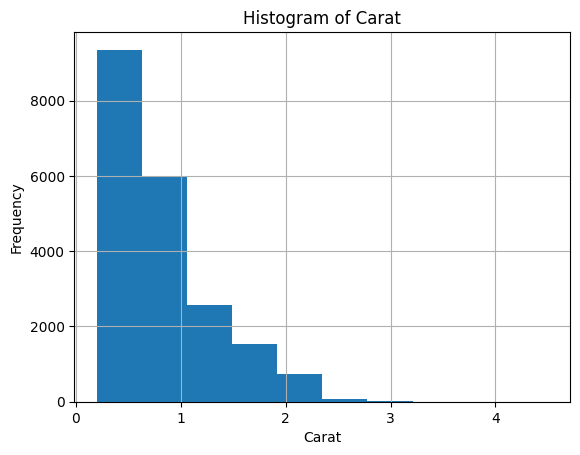

In [ ]:
# Plot histogram of carat
gem_data['carat'].hist()
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.title('Histogram of Carat')
plt.show()

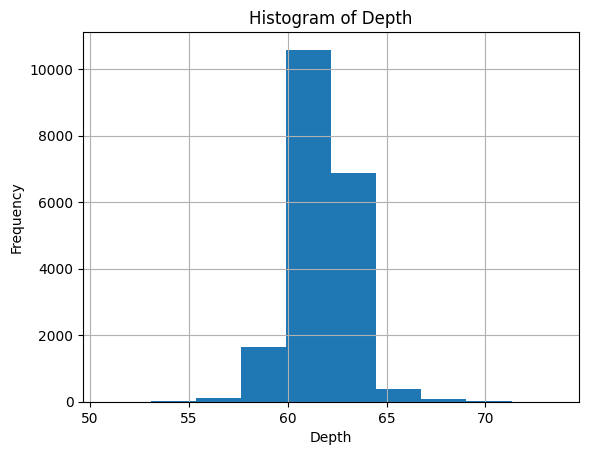

In [ ]:
# Plot histogram of depth
gem_data['depth'].hist()
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depth')
plt.show()  

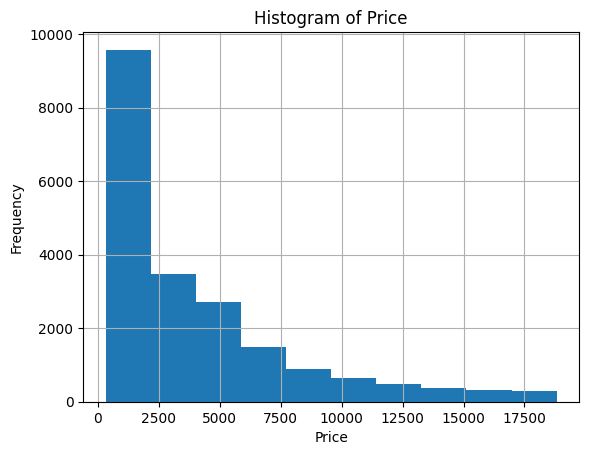

In [ ]:
# Plot histogram of price
gem_data['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

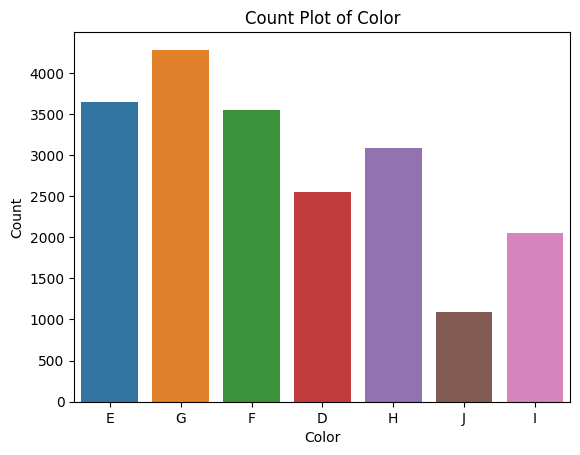

In [ ]:
# Create a count plot for color
sns.countplot(data=gem_data, x='color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count Plot of Color')
plt.show()

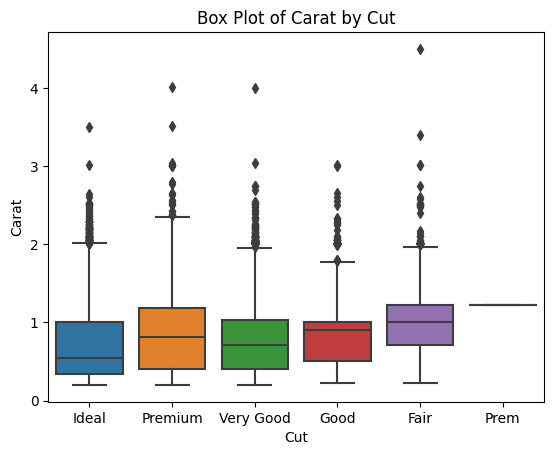

In [ ]:
# Create a box plot of carat across different cuts
sns.boxplot(data=gem_data, x='cut', y='carat')
plt.xlabel('Cut')
plt.ylabel('Carat')
plt.title('Box Plot of Carat by Cut')
plt.show()

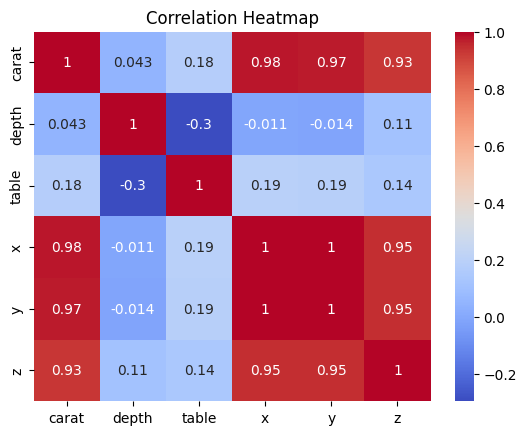

In [ ]:
# Select the numerical columns for correlation heatmap
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
corr_matrix = gem_data[numerical_cols].corr()

# Create a heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The code selects the numerical columns from the gem_data DataFrame to create a scatter plot matrix. The selected numerical columns are 'carat', 'depth', 'table', 'x', 'y', 'z', and 'price'.

The sns.pairplot() function from the Seaborn library is then used to create a matrix of scatter plots. This function plots the pairwise relationships between the selected numerical columns. It creates scatter plots where each plot visualizes the relationship between two numerical columns.

Finally, plt.show() is used to display the scatter plot matrix.

The purpose of creating a scatter plot matrix is to gain insight into the relationships between numerical features and the target variable, which in this case is 'price'. The scatter plot matrix allows us to visually analyze the correlations, patterns, and distributions between different features and the target variable. It helps in understanding how each feature relates to the price and provides a quick overview of their relationships.

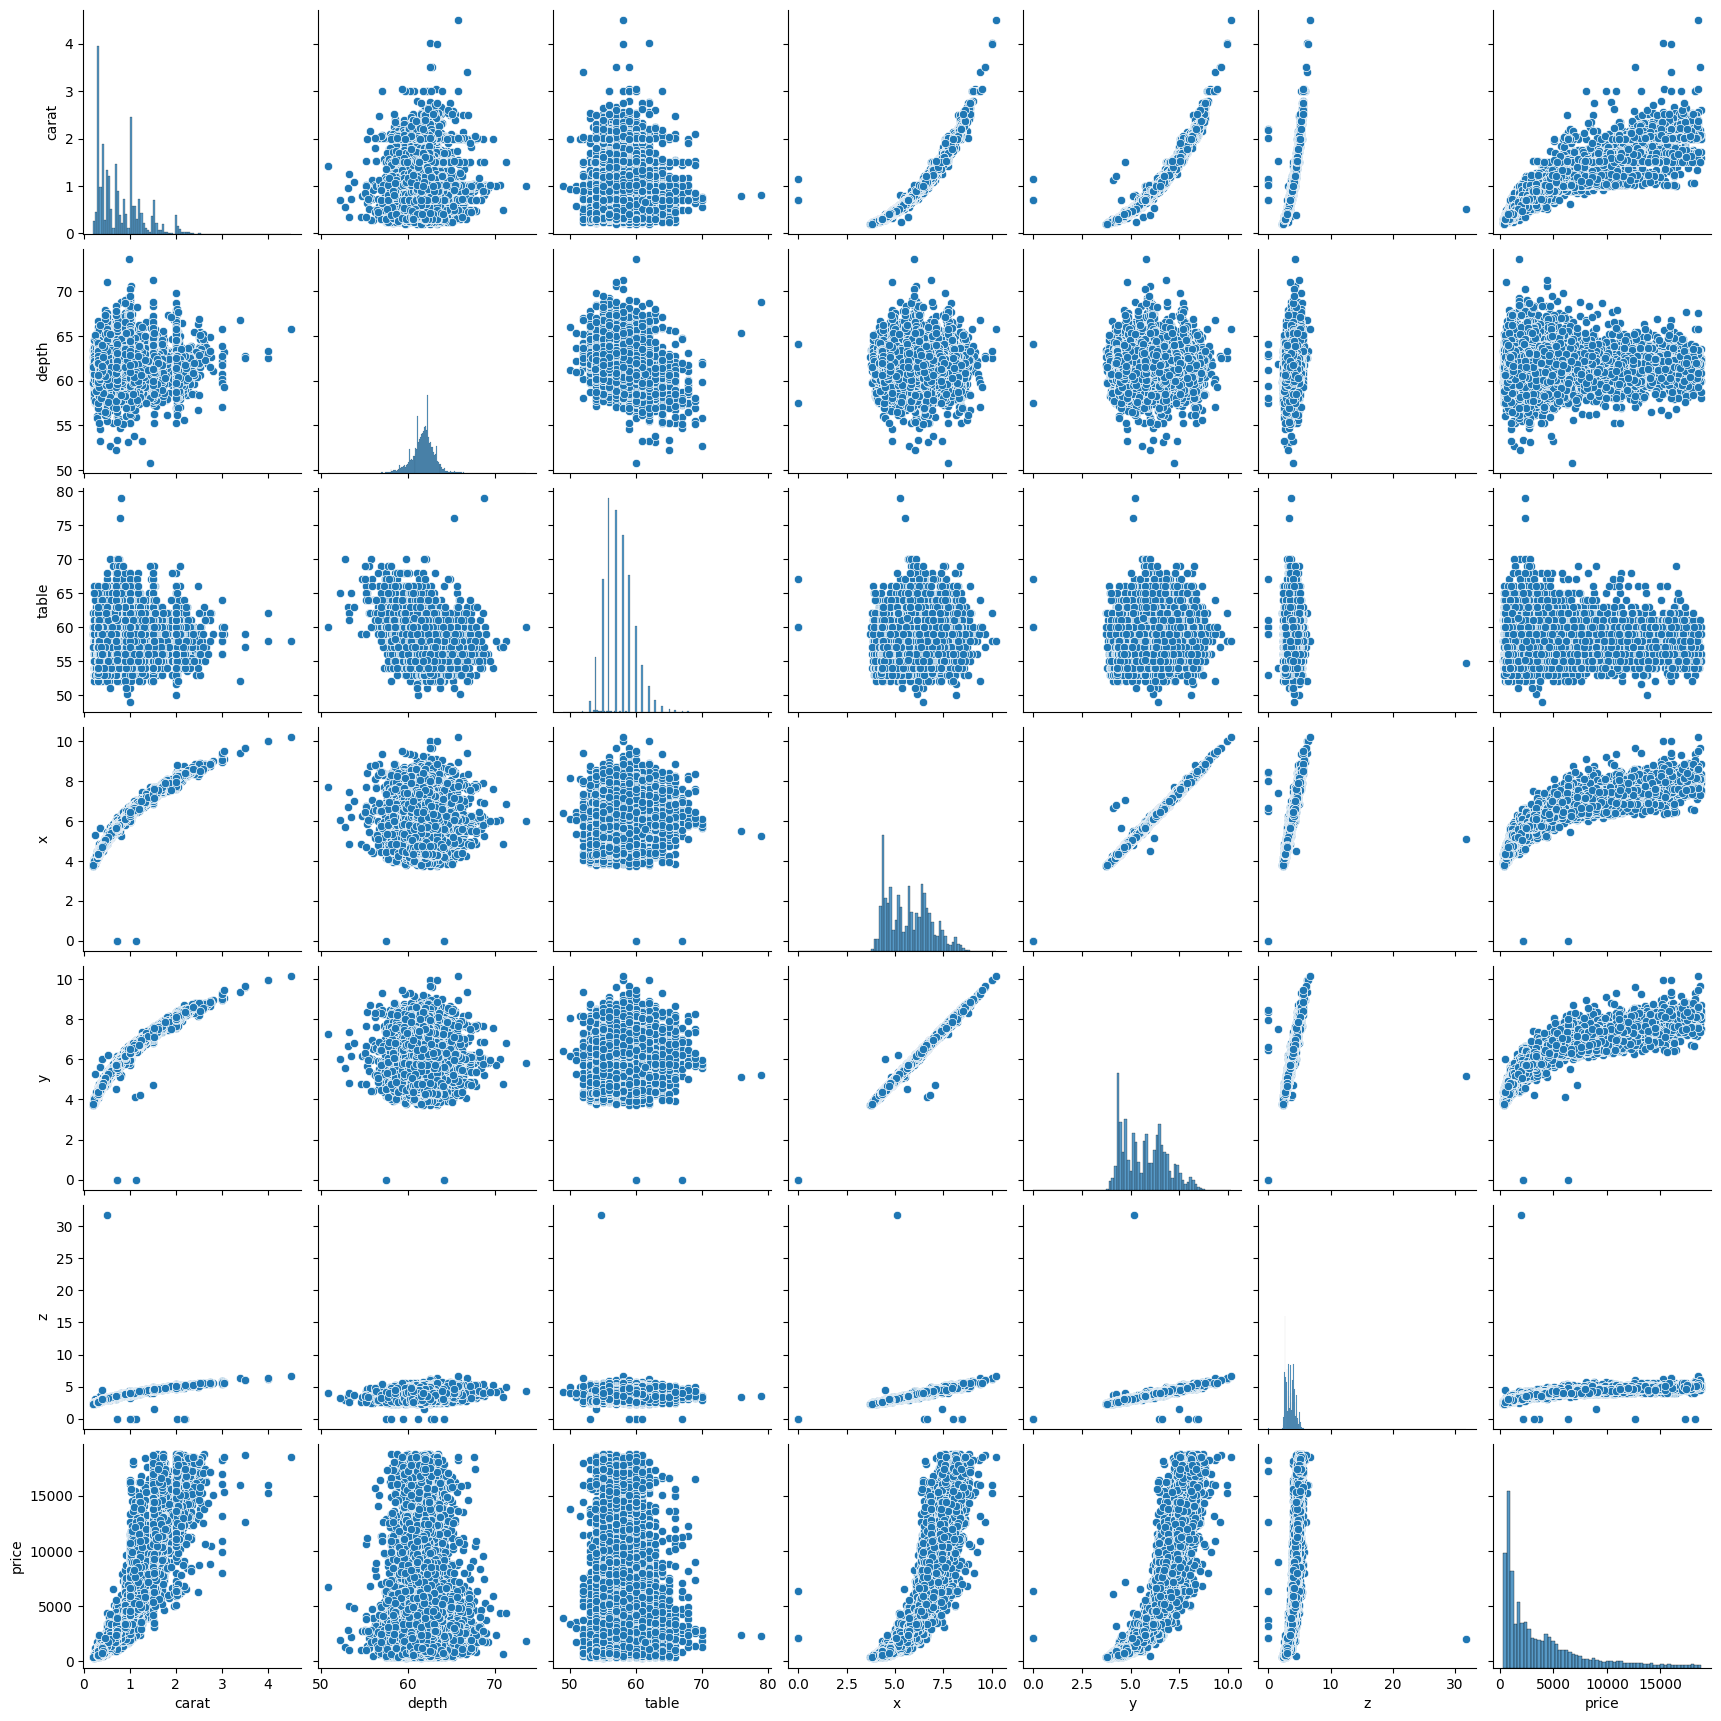

In [ ]:
# Select the numerical columns for scatter plot matrix
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
sns.pairplot(gem_data[numerical_cols])
plt.show()

<ipython-input-29-10c0a80f94a9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gem_data, x=col, y='price', ci=None)


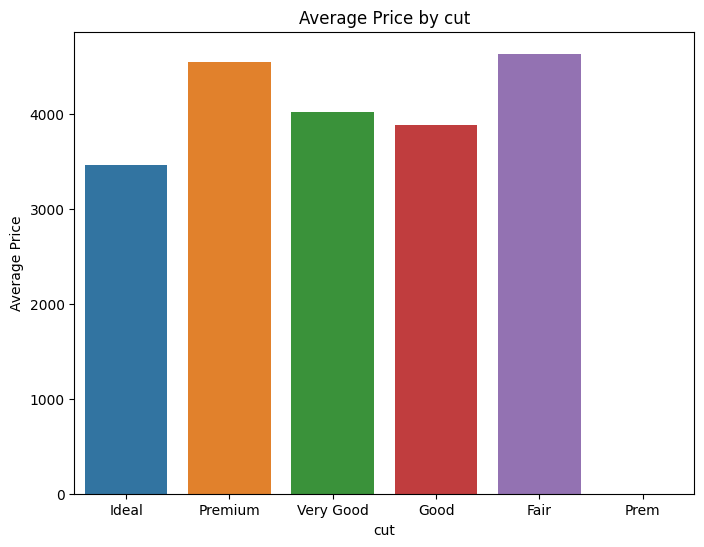

<ipython-input-29-10c0a80f94a9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gem_data, x=col, y='price', ci=None)


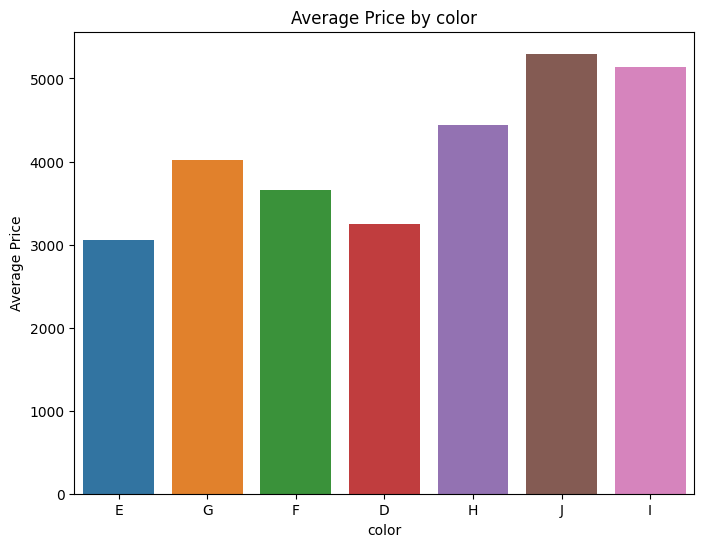

<ipython-input-29-10c0a80f94a9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=gem_data, x=col, y='price', ci=None)


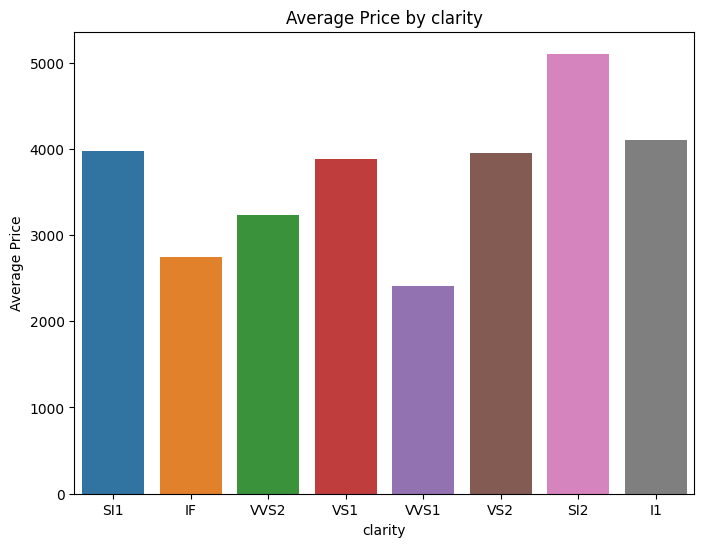

In [ ]:
# Select the categorical columns for bar plot
categorical_cols = ['cut', 'color', 'clarity']

# Create bar plots for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=gem_data, x=col, y='price', ci=None)
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {col}')
    plt.show()

# Creating a model to predict price

first we try a simple regression model that uses only carat to predict price

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Drop rows with NaN values in any column
gem_data.dropna(axis=0, how='any', inplace=True)

# Select the 'carat' feature as X and 'price' as y
X = gem_data[['carat']]
y = gem_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,carat
13797,0.73
14377,0.32
4845,1.21
5742,0.36
18502,0.50


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a Sequential model with multiple hidden layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a custom metric for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Train the model with validation
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[tf.keras.callbacks.TensorBoard()])

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

# Plot the training and validation RMSE
plt.plot(np.sqrt(history.history['loss']), label='Training RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Epoch 1/50


ValueError: ignored

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

not very good, so we can try use other features too

Epoch 1/100
395/395 [==============================] - 3s 6ms/step - loss: 13783852.0000 - val_loss: 2619155.0000
Epoch 2/100
395/395 [==============================] - 1s 4ms/step - loss: 2273072.7500 - val_loss: 2409543.5000
Epoch 3/100
395/395 [==============================] - 1s 3ms/step - loss: 2180514.0000 - val_loss: 2382784.7500
Epoch 4/100
395/395 [==============================] - 1s 3ms/step - loss: 2140768.2500 - val_loss: 2328203.0000
Epoch 5/100
395/395 [==============================] - 1s 3ms/step - loss: 2116665.0000 - val_loss: 2310126.5000
Epoch 6/100
395/395 [==============================] - 2s 4ms/step - loss: 2098801.0000 - val_loss: 2320252.2500
Epoch 7/100
395/395 [==============================] - 1s 4ms/step - loss: 2101804.2500 - val_loss: 2305111.2500
Epoch 8/100
395/395 [==============================] - 1s 3ms/step - loss: 2086131.0000 - val_loss: 2312585.2500
Epoch 9/100
395/395 [==============================] - 1s 3ms/step - loss: 2080311.6250 - val_l

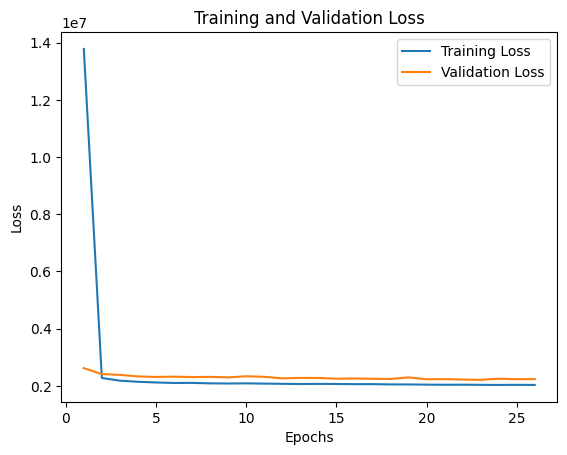

RMSE 1398.9828447840239
124/124 [==============================] - 0s 1ms/step


In [ ]:
# Select the features (X) and the target (y)
X = gem_data[['carat', 'depth', 'table']]
y = gem_data['price']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

# Train the model with validation and early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

# Retrieve the loss history from the training process
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('RMSE', np.sqrt(loss))

# Make predictions
y_pred = model.predict(X_test_scaled)

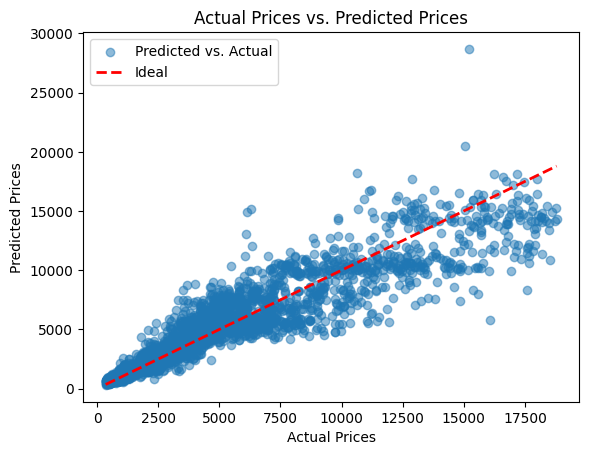

In [ ]:

# Plot the predicted prices and actual prices
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Drop rows with NaN values in any column
gem_data.dropna(axis=0, how='any', inplace=True)

# Select the features (X) and the target (y)
X = gem_data[['carat', 'depth', 'table']]
y = gem_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))

Mean Squared Error: 2194111.9987462806
Root Mean Squared Error: 1481.2535227793655


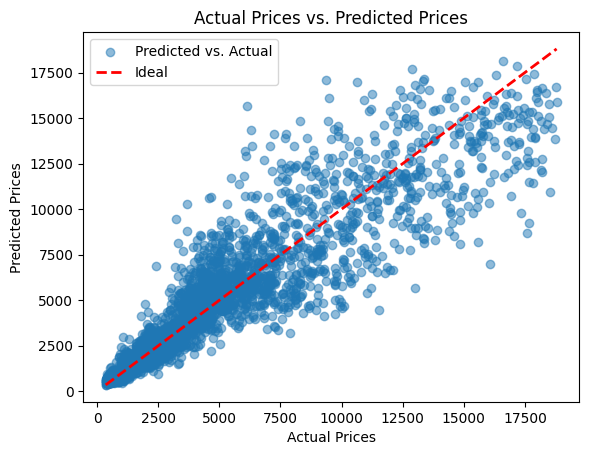

In [ ]:

# Plot the predicted prices and actual prices
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()